In [31]:
# ----------------------------------------------------------------------
# Step 1: Import all necessary modules for analysis
# ----------------------------------------------------------------------
# import modules for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from aux_func import cleanUpTicks

In [3]:
# ----------------------------------------------------------------------
# Step 2: Set up db connection and session
# ----------------------------------------------------------------------
# set up sqlalchemy engine
from sqlalchemy import create_engine
engine = create_engine('sqlite:///hawaii.sqlite')

# set up sqlalchemy base
from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)

# map classes
Station = Base.classes.stations
Measurement = Base.classes.measurements

# set up session
from sqlalchemy.orm import Session
session = Session(engine)

Precipitation Analysis

1. Design a query to retrieve the last 12 months of precipitation data.

2. Select only the date and prcp values.

3. Load the query results into a Pandas DataFrame and set the index to the date column.

4. Plot the results using the DataFrame plot method.

pd.read_sql(session.query(Complaint).filter(Complaint.id == 2).statement,session.bind) 


In [4]:
# ----------------------------------------------------------------------
# Step 3: Select start and end dates for my trip
# ----------------------------------------------------------------------
start_date = '2018-06-29'
end_date = '2018-07-04'

In [11]:
# ----------------------------------------------------------------------
# Step 4: Plot 12 months of precipitation data using using DF.plot.
#         Since didn't have data past August 2017, set end date at the 
#         last date where data was available
# ----------------------------------------------------------------------
# create variables for last year's date in string format and query (for readability)
last_year_start = (dt.date(2017,8,23) - dt.timedelta(days=365)).isoformat()
query = f'SELECT date, precipitation FROM measurements WHERE date > "{last_year_start}"'

# read query into dataframe
last_year_prec_df = pd.read_sql(query, engine)
last_year_prec_df.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


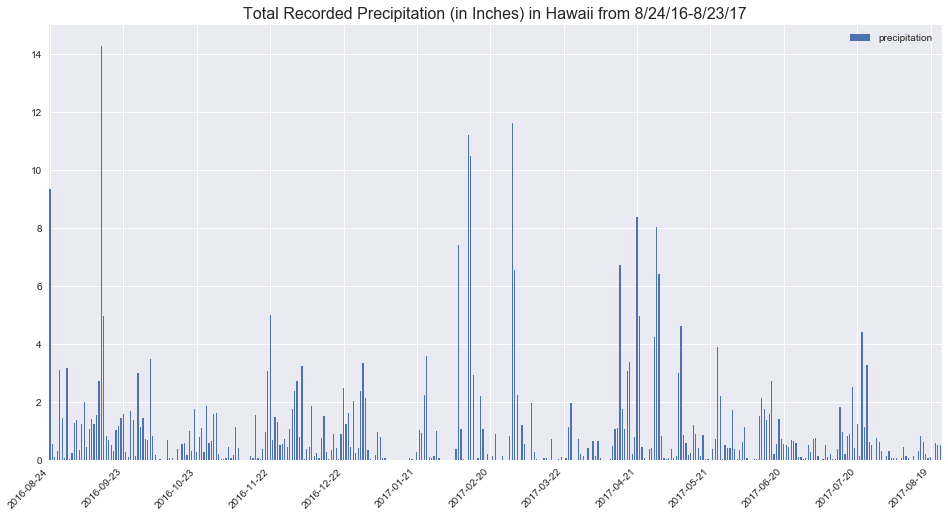

In [51]:
# set style
sns.set()
plt.rcParams["figure.figsize"] = [16,8]

# plot the dataframe
last_year_grouped_df = last_year_prec_df.groupby('date').sum().reset_index()
last_year_grouped_df.plot.bar()
plt.title('Total Recorded Precipitation (in Inches) in Hawaii from 8/24/16-8/23/17', 
          size=16)

# set proper labels
plt.xticks([x*30 for x in np.arange(13)],
           [list(last_year_grouped_df['date'])[x*30] for x in np.arange(13)],
           rotation=45, horizontalalignment='right')
plt.show()

In [17]:
# display summary statistics
last_year_prec_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
